# <br> MÓDULO 1:

## Punto A:

Creación de imagen 400x400 dividida en 4 colores:



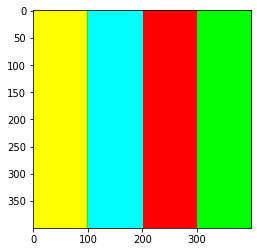

In [3]:
%matplotlib inline 
from skimage import io, color
import numpy as np
import cv2
from PIL import Image, ImageColor
import matplotlib.pyplot as plt
u=Image.new(mode='RGB',size=(400,400),color=('yellow'))
plt.imshow(u)

R=255
G=255
B=0
for i in range(0,400):
    for j in range(100,400):
        if j>100 and j<=200:
            R=0
            G=255
            B=255
        elif j>200 and j<=300:
            R=255
            G=0
            B=0
        elif j>300 and j<=400:
            R=0
            G=255
            B=0
        u.putpixel((j,i), (R,G,B))   
        

plt.imshow(u)

<br></br>
Primero se creó una imagen 400x400 en amarillo, luego se crearon 2 for que iteraran por toda la imagen y cada 100 pixeles cambiaban el valor de la variables 'R','G' Y 'B',se reemplaza en la imagen este nuevo color con la función putpixel() en la imagen original y luego se hizo un plt.imshow.

## Punto B:

[[233 233 233 ... 224 224 224]
 [233 233 233 ... 224 224 224]
 [233 233 233 ... 224 224 224]
 ...
 [233 233 233 ... 224 224 224]
 [233 233 233 ... 224 224 224]
 [233 233 233 ... 224 224 224]]


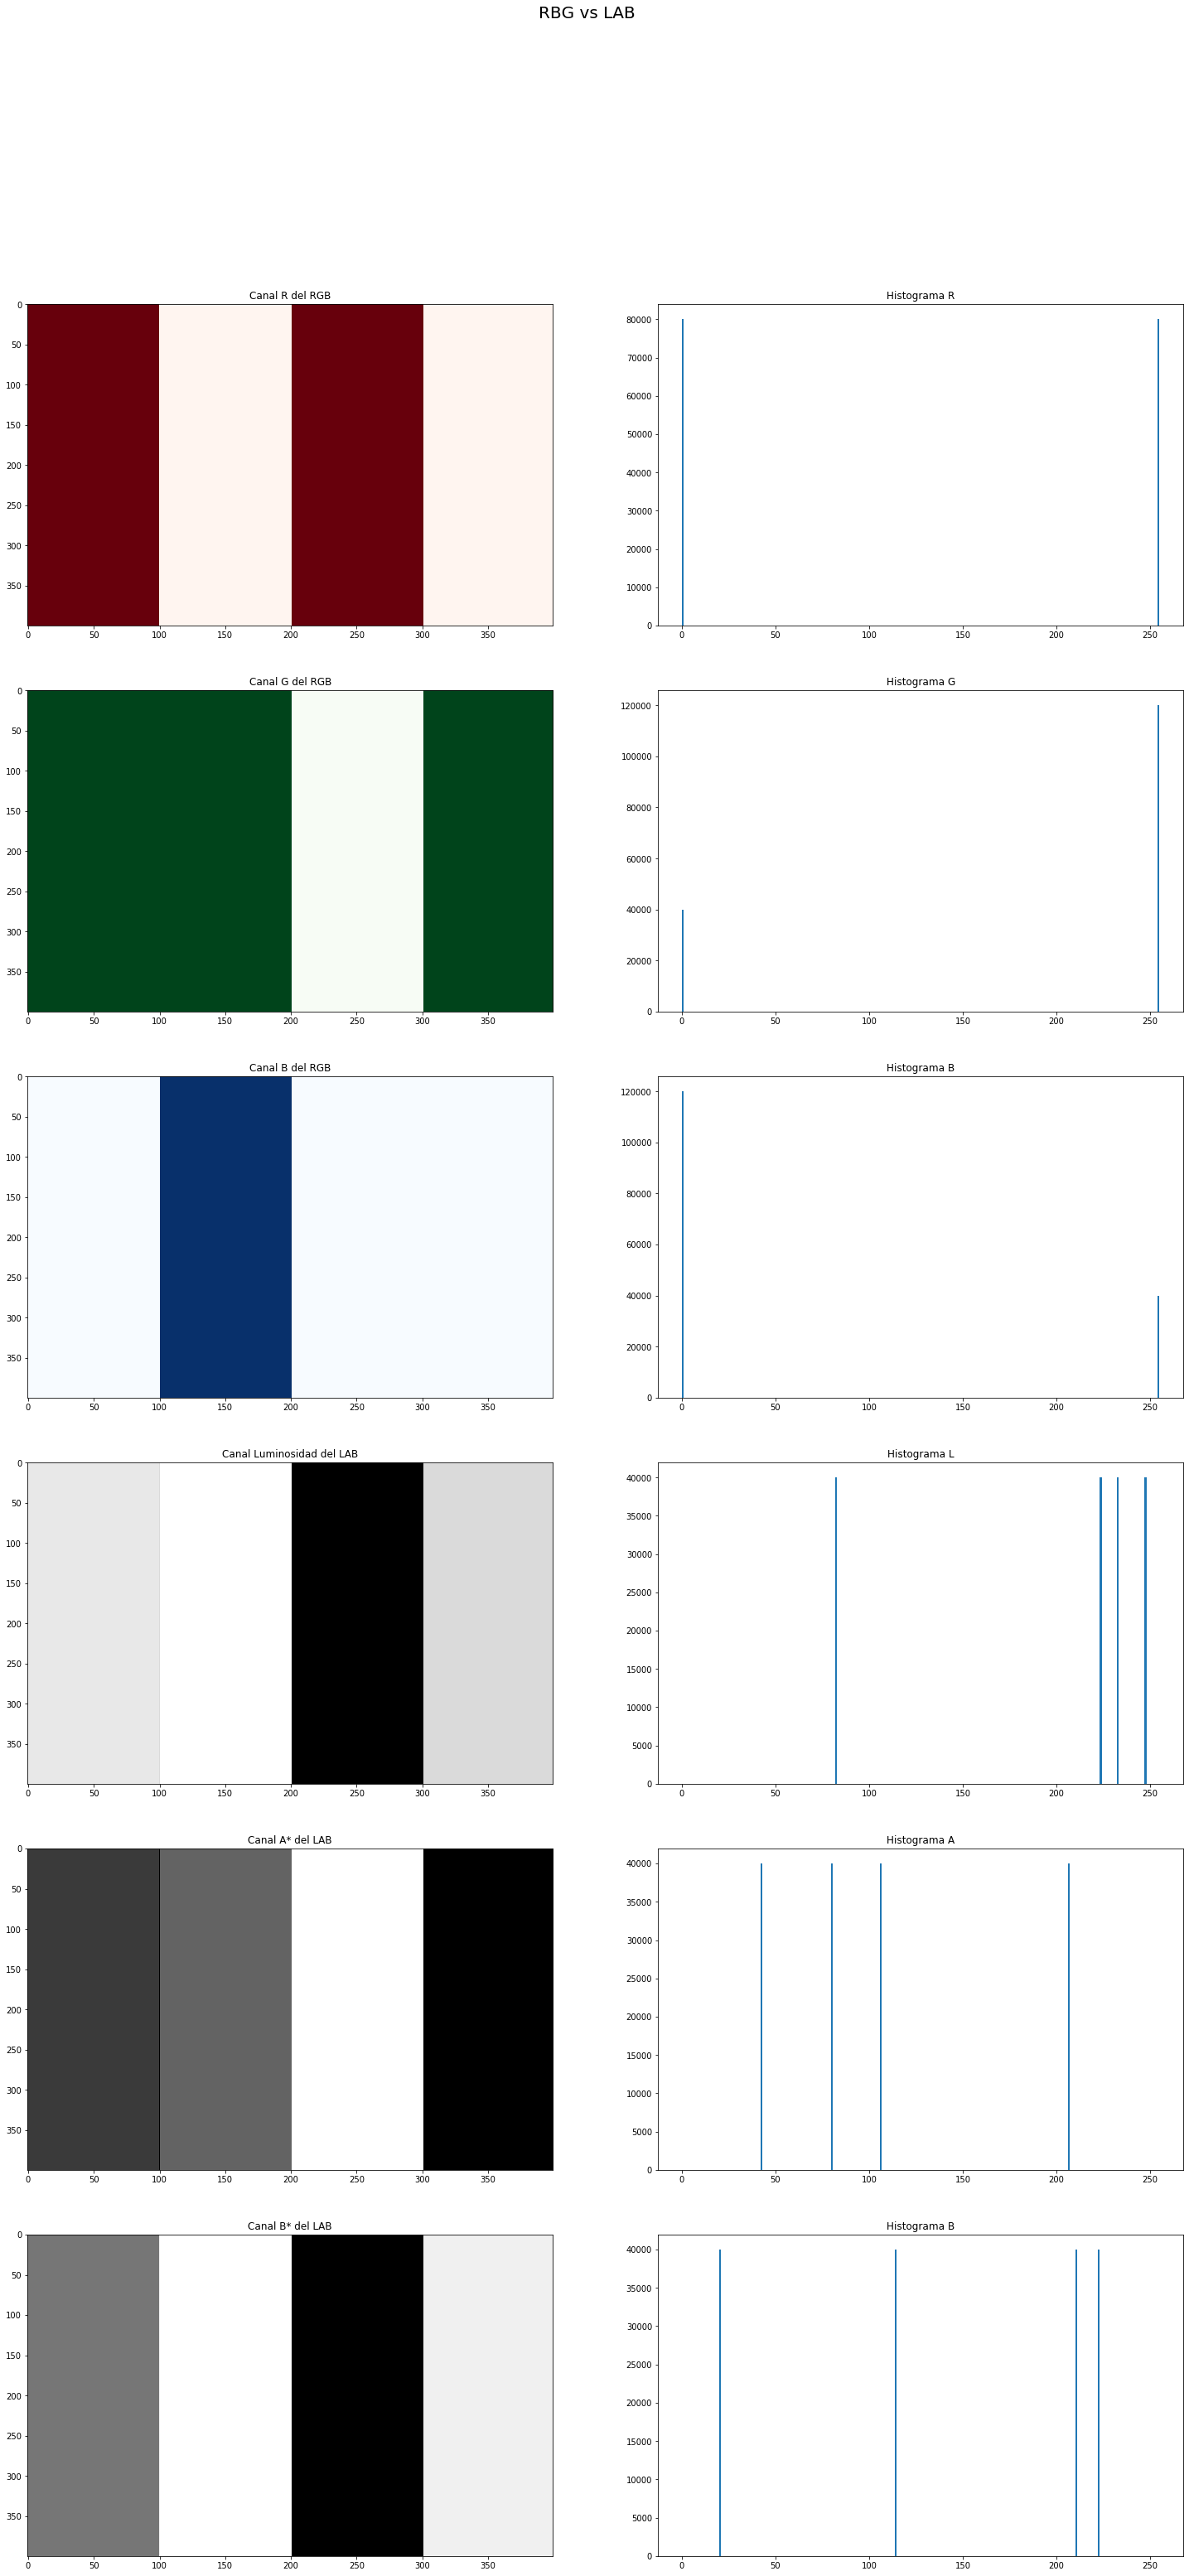

In [15]:
#Lectura de cada canal correspondiente al espacio RGB
uj= np.array(u)
uj= uj[:, :, ::-1].copy()

uj_rgb=cv2.cvtColor(uj, cv2.COLOR_BGR2RGB)
uj_R = uj_rgb[:,:,0]
uj_G = uj_rgb[:,:,1]
uj_B = uj_rgb[:,:,2]
#Lectura de cada canal correspondiente al espacio LAB
uj_lab = cv2.cvtColor(uj, cv2.COLOR_RGB2LAB)

uj_L = uj_lab[:,:,0]
uj_A =  uj_lab[:,:,1]
ujlab_B = uj_lab[:,:,2]
#Mostrar y comparar imágenes
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12)) = plt.subplots(6,2, figsize=(25,50))
fig.suptitle('RBG vs LAB', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(uj_R, cmap='Reds', aspect='auto')
ax2.set_title('Histograma R')
ax2.hist(uj_R.ravel(), bins=256, range=(0.0, 255.0))
ax3.set_title('Canal G del RGB')
ax3.imshow(uj_G, cmap='Greens', aspect='auto')
ax4.set_title('Histograma G')
ax4.hist(uj_G.ravel(), bins=256, range=(0.0, 255.0))
ax5.set_title('Canal B del RGB')
ax5.imshow(uj_B, cmap='Blues', aspect='auto')
ax6.set_title('Histograma B')
ax6.hist(uj_B.ravel(), bins=256, range=(0.0, 255.0))
ax7.set_title('Canal Luminosidad del LAB')
ax7.imshow(uj_L, cmap='gray', aspect='auto')
ax8.set_title('Histograma L')
ax8.hist(uj_L.ravel(), bins=256, range=(0.0, 255.0))
ax9.set_title('Canal A* del LAB')
ax9.imshow(uj_A, cmap='gray', aspect='auto')
ax10.set_title('Histograma A')
ax10.hist(uj_A.ravel(), bins=256, range=(0.0, 255.0))
ax11.set_title('Canal B* del LAB')
ax11.imshow(ujlab_B, cmap='gray', aspect='auto')
ax12.set_title('Histograma B')
_=ax12.hist(ujlab_B.ravel(), bins=256, range=(0.0, 255.0))

<br></br>
Recordemos que el código RGB de los colores que contiene la imagen creada son:
color=(R,G,B)
1. Amarillo=(255,255,0)
2. Cyan=(0,255,255)
3. Rojo=(255,0,0)
4. Verde=(0,255,0)


* Imagen en canal R(RGB): Al usar el canal R de RGB se obtiene que el amarillo y el rojo se convierten en máximos del canal(rojo oscuro) por su composición en RGB, al contrario de los otros dos colores que se vuelven mínimos del canal.

* Imagen en canal G(RGB): Con el canal G de RGB se obtiene que el amarillo, cyan y verde se convierten en máximos del canal(verde oscuro) por su composición en RGB, al contrario de el otro color que se vuelve mínimo del canal.

* Imagen en canal B: En el canal B de RGB se obtiene que el cyan se convierte en máximo del canal(azul oscuro) por su composición en RGB, al contrario de los otros tres colores que se vuelven mínimos del canal.

* Imagen en canal L(LAB): Al convertir los colores a L(luminosidad) los colores más claros como el cyan tienden a blanco y los más oscuros a negro

* Imagen en canal A(LAB): El canal A consiste en la relación entre rojo y verde que se puede ver en cada imagen por ejemplo con el amarillo al ser (R,G,B)=(255,255,0) es gris, los otros al solo tener una componente en rojo o verde son completamente blancos o oscuros

* Imagen en canal B(LAB): Análogamente al canal anterior, este trata la relación entre el amarillo y el azul y funciona de manera similar.

## Punto C:

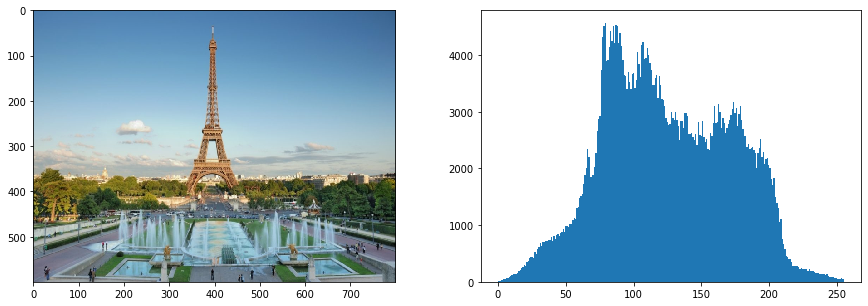

In [4]:
eif = cv2.imread("res/eiffel.jpg", cv2.IMREAD_COLOR)
eif= cv2.resize(eif,(800,600))
eif_rgb  = cv2.cvtColor(eif, cv2.COLOR_BGR2RGB)
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15,5))
ax1.imshow(eif_rgb)
_=ax2.hist(eif_rgb[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

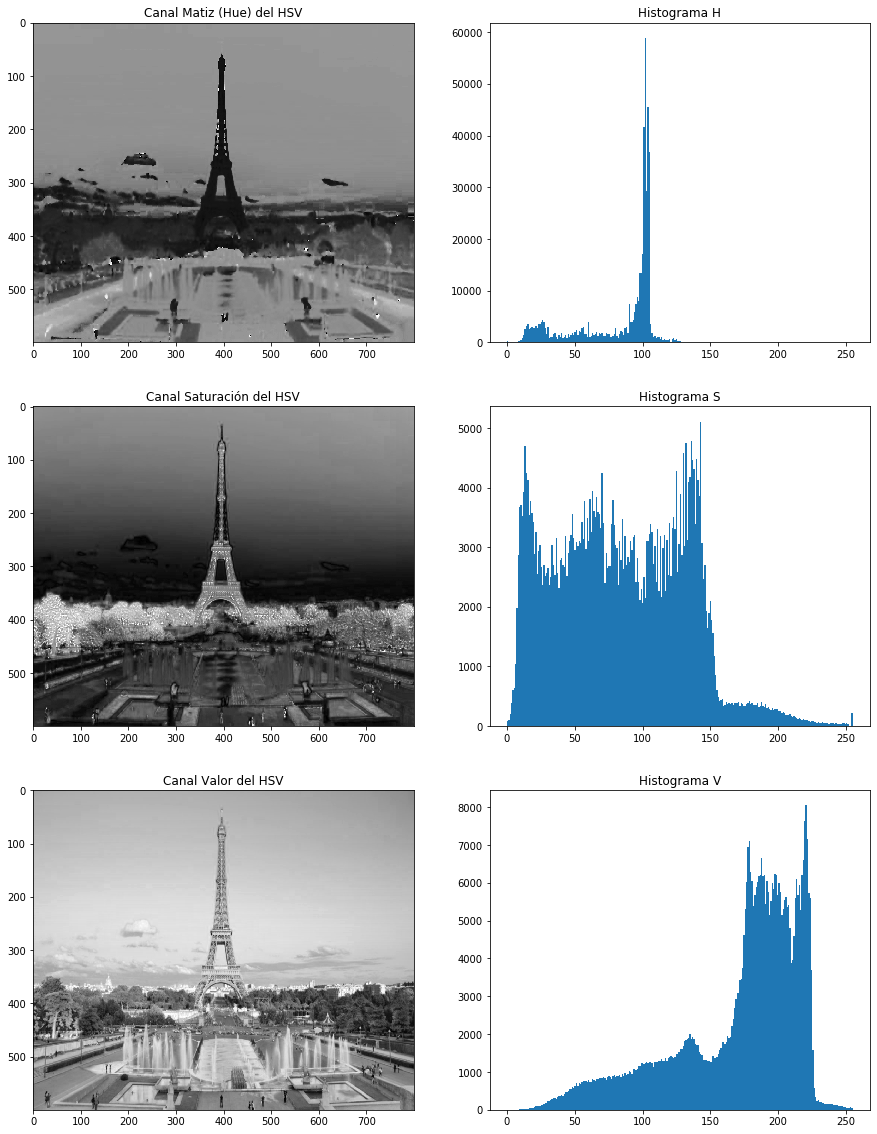

In [6]:
eif_hsv = cv2.cvtColor(eif, cv2.COLOR_BGR2HSV)
eif_H = eif_hsv[:,:,0]
eif_S =  eif_hsv[:,:,1]
eif_V = eif_hsv[:,:,2]

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2, figsize=(15,20))
ax1.set_title('Canal Matiz (Hue) del HSV')
ax1.imshow(eif_H, cmap='gray', aspect='auto')
ax2.set_title('Histograma H')
ax2.hist(eif_H.ravel(), bins=256, range=(0.0, 255.0))
ax3.set_title('Canal Saturación del HSV')
ax3.imshow(eif_S, cmap='gray', aspect='auto')
ax4.set_title('Histograma S')
ax4.hist(eif_S.ravel(), bins=256, range=(0.0, 255.0))
ax5.set_title('Canal Valor del HSV')
ax5.imshow(eif_V, cmap='gray', aspect='auto')
ax6.set_title('Histograma V')
_=ax6.hist(eif_V.ravel(), bins=256, range=(0.0, 255.0))

La mejor manera de extraer la torre usando HSV es con el canal S aunque no es la mejor manera, ya que en la parte superior de la torre se nota una pérdida de información en la segmentación.

## Punto 2:

#### 2.1 Montaje y objetos

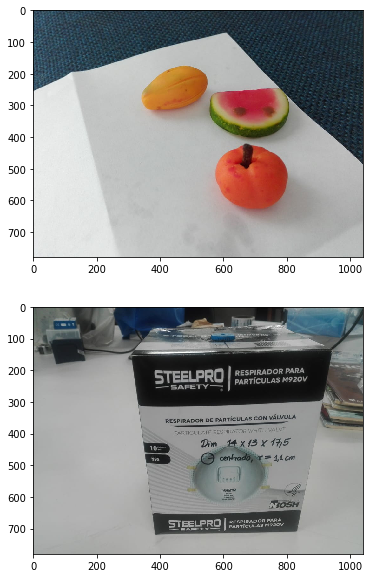

In [61]:
fig, arreglo_plots = plt.subplots(2,1, figsize=(20,10))
colors = ('r','g','b')

fru = cv2.imread("res/Frutas.png", cv2.IMREAD_COLOR )
fru = cv2.cvtColor(fru, cv2.COLOR_BGR2RGB)
arreglo_plots[0].imshow(fru)

mon = cv2.imread("res/Montaje.png", cv2.IMREAD_COLOR )
mon = cv2.cvtColor(mon, cv2.COLOR_BGR2RGB)
arreglo_plots[1].imshow(mon)


### 2.2 Descripción del montaje

El dispositivo de control de iluminación de imagen consta de una caja de cartón flexible, cuyas dimensiones son *14 x 13 x17.5 cm*
En el centro de la parte superior (donde se cruzan las diagonales) se cortó un agujero circular de *2 cm* de radio, medida óptima para posicionar tanto la cámara como el flash de un teléfono celular.

El conjunto de objetos elegido consiste en 6 frutas de mazapán de tamaño pequeño, agrupadas de tres maneras diferentes. 
Las dimensiones de las frutas son las siquientes: 

* Papaya: 3.5 x 1 x 2cm
* Durazno: r = 1cm
* Calabaza: r = 2.5cm
* Banano: 4.5 x 1.5 x 1cm
* Pera: r = 1cm
* Sandía: 3.5 x 2.5 x 0.5 cm

La toma de imágenes se realizó con la cámara de un celular Huawei Y6II L-23, que cuenta con *13 megapíxeles* 
Las imágenes tomadas son de dimensiones 4160x3120
ISO = 360
F = 2.00
S = 1/33s

La distancia promedio entre los objetos posicionados y el lente fue de aproximadamene *1,4 cm, que representan* *2/25* de la altura del dispositivo.


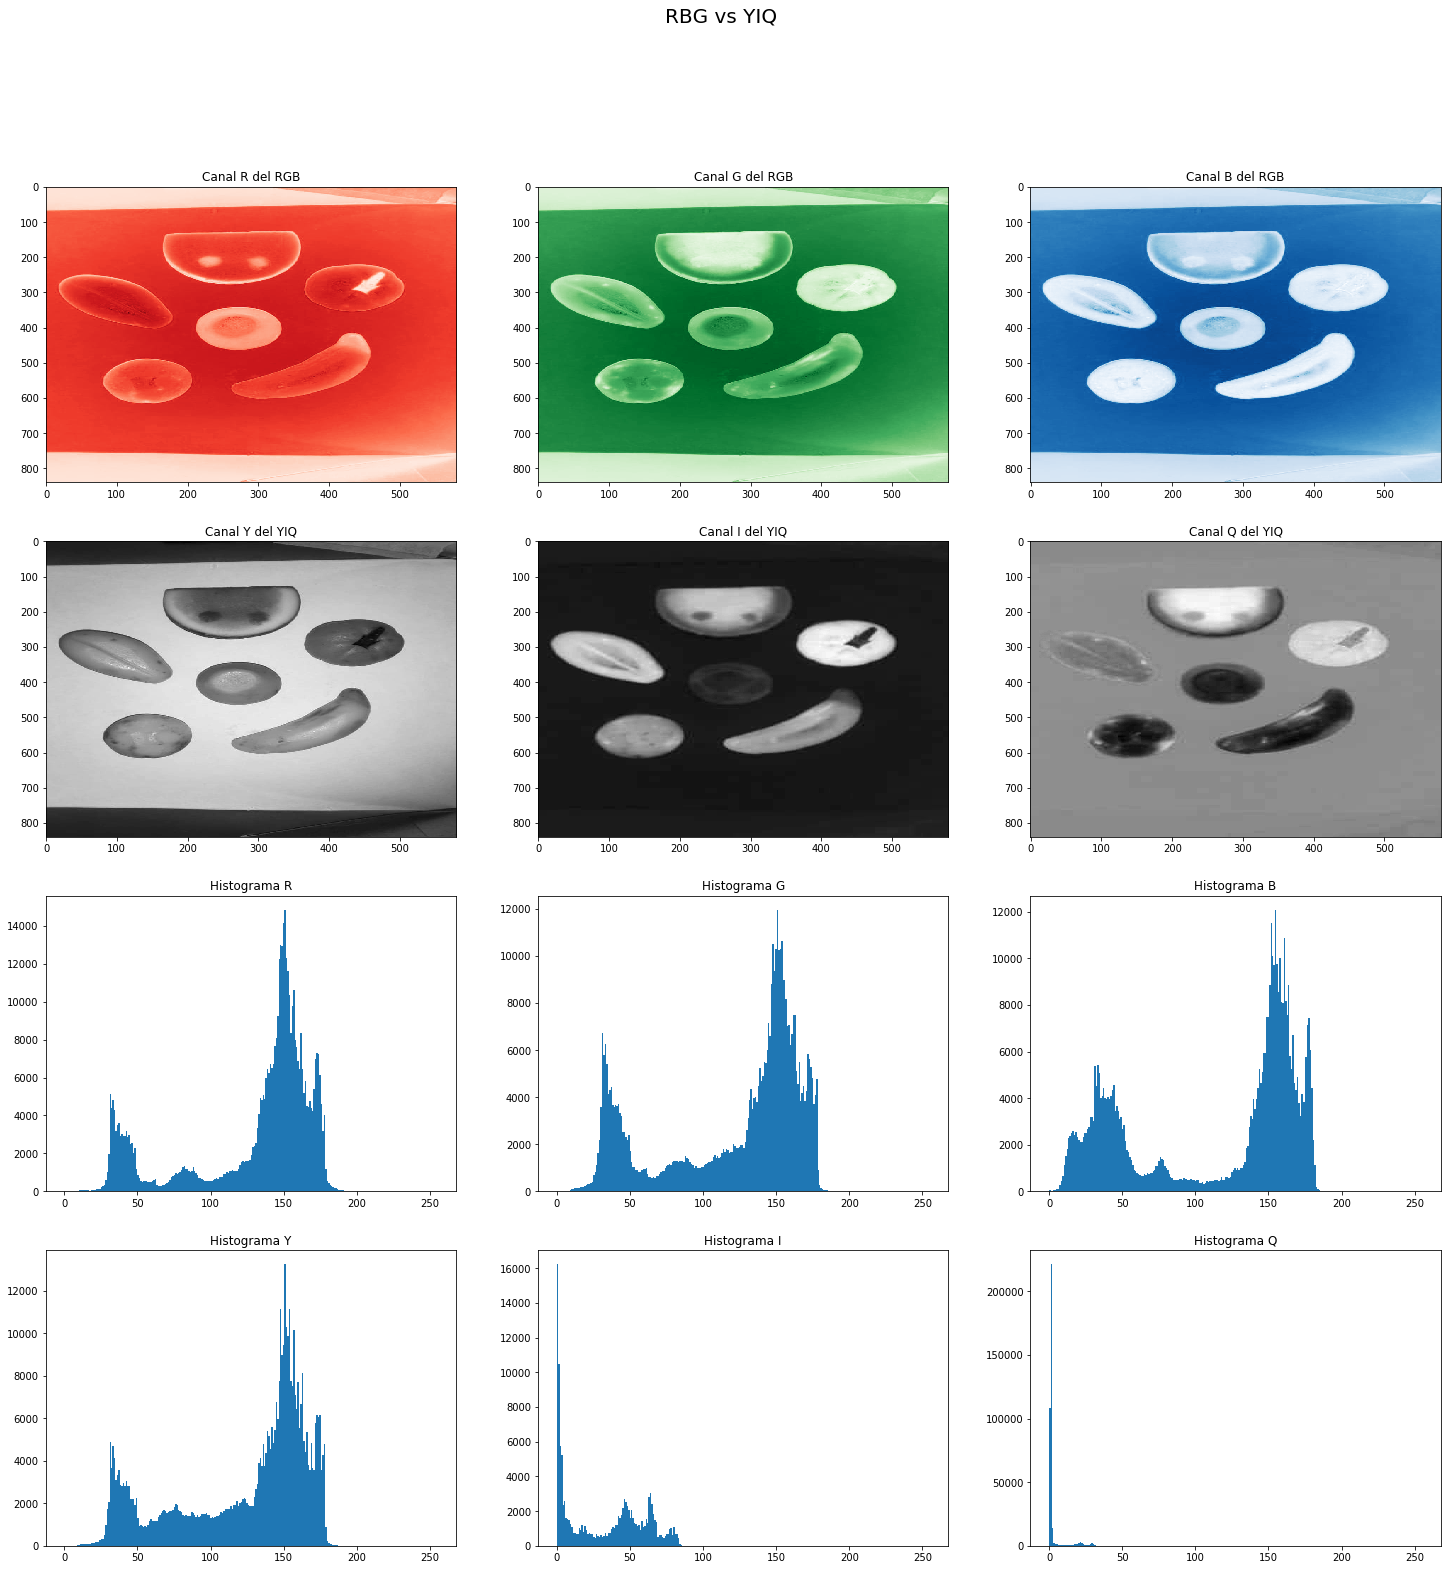

In [21]:
#Todas las frutas

frutas = cv2.imread("res/Frutas1.png", cv2.IMREAD_COLOR)
frutas_rgb  = cv2.cvtColor(frutas, cv2.COLOR_BGR2RGB)
frutas_rgb = frutas_rgb[100:-100,100:-100]

##
#Espacio RGB
frutas_R = frutas_rgb[:,:,0]
frutas_G = frutas_rgb[:,:,1]
frutas_B = frutas_rgb[:,:,2]

#Espacio CMY 
frutas_C = 255 - frutas_rgb[:,:,0]
frutas_M = 255 - frutas_rgb[:,:,1]
frutas_Y = 255 - frutas_rgb[:,:,2]

#Espacio YIQ
frutas_Y = 0.299*frutas_R + 0.587*frutas_G + 0.114*frutas_B
frutas_I2 = 0.596*frutas_R - 0.274*frutas_G - 0.322*frutas_B
frutas_Q = 0.211*frutas_R - 0.523*frutas_G + 0.312*frutas_B

#Comparación de los canales
fig, ((ax1, ax2, ax3),(ax4,ax5,ax6),(ax7, ax8, ax9),(ax10,ax11,ax12)) = plt.subplots(4,3, figsize=(25, 25))
fig.suptitle('RBG vs YIQ', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(frutas_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(frutas_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(frutas_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YIQ')
ax4.imshow(frutas_Y,cmap='gray',aspect='auto')
ax5.set_title('Canal I del YIQ')
ax5.imshow(frutas_I2,cmap='gray',aspect='auto')
ax6.set_title('Canal Q del YIQ')
ax6.imshow(frutas_Q,cmap='gray',aspect='auto')
ax7.set_title('Histograma R')
ax7.hist(frutas_R.ravel(), bins=256, range=(0.0, 255.0))
ax8.set_title('Histograma G')
ax8.hist(frutas_G.ravel(), bins=256, range=(0.0, 255.0))
ax9.set_title('Histograma B')
ax9.hist(frutas_B.ravel(), bins=256, range=(0.0, 255.0))
ax10.set_title('Histograma Y')
ax10.hist(frutas_Y.ravel(), bins=256, range=(0.0, 255.0))
ax11.set_title('Histograma I')
ax11.hist(frutas_I2.ravel(), bins=256, range=(0.0, 255.0))
ax12.set_title('Histograma Q')
_=ax12.hist(frutas_Q.ravel(), bins=256, range=(0.0, 255.0))

Se procede a graficar los histógramas de RGB y YIQ junto a sus histogramas y se ve que es mejor usar el canal RGB al tener diferencias de color más pronunciadas, especialmente en el canal B del RGB. Se concluye entonces que es mejor usar B(RGB)

# MÓDULO 2:

## Punto 1:

Imágenes de Colombia y Japón:


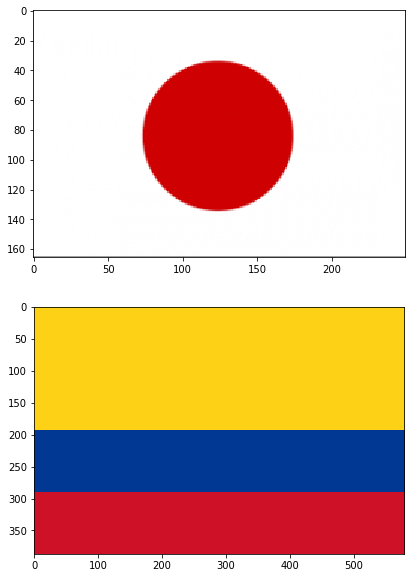

In [8]:
fig, arreglo_plots = plt.subplots(2,1, figsize=(20,10))
colors = ('r','g','b')

img = cv2.imread("res/jap.png", cv2.IMREAD_COLOR )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
arreglo_plots[0].imshow(img)

img2 = cv2.imread("res/col.png", cv2.IMREAD_COLOR )
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
arreglo_plots[1].imshow(img2)


<br> Se aplicó la siguientes transformación, tomando como I1 la bandera de Japón e I2 la bandera de Colombia </br>

# <center> $ G(x,y) = (1-k)*I1(x,y) + k*I2(x,y) $ </center>

# <center> $ 0 < k < 1 $ </center>

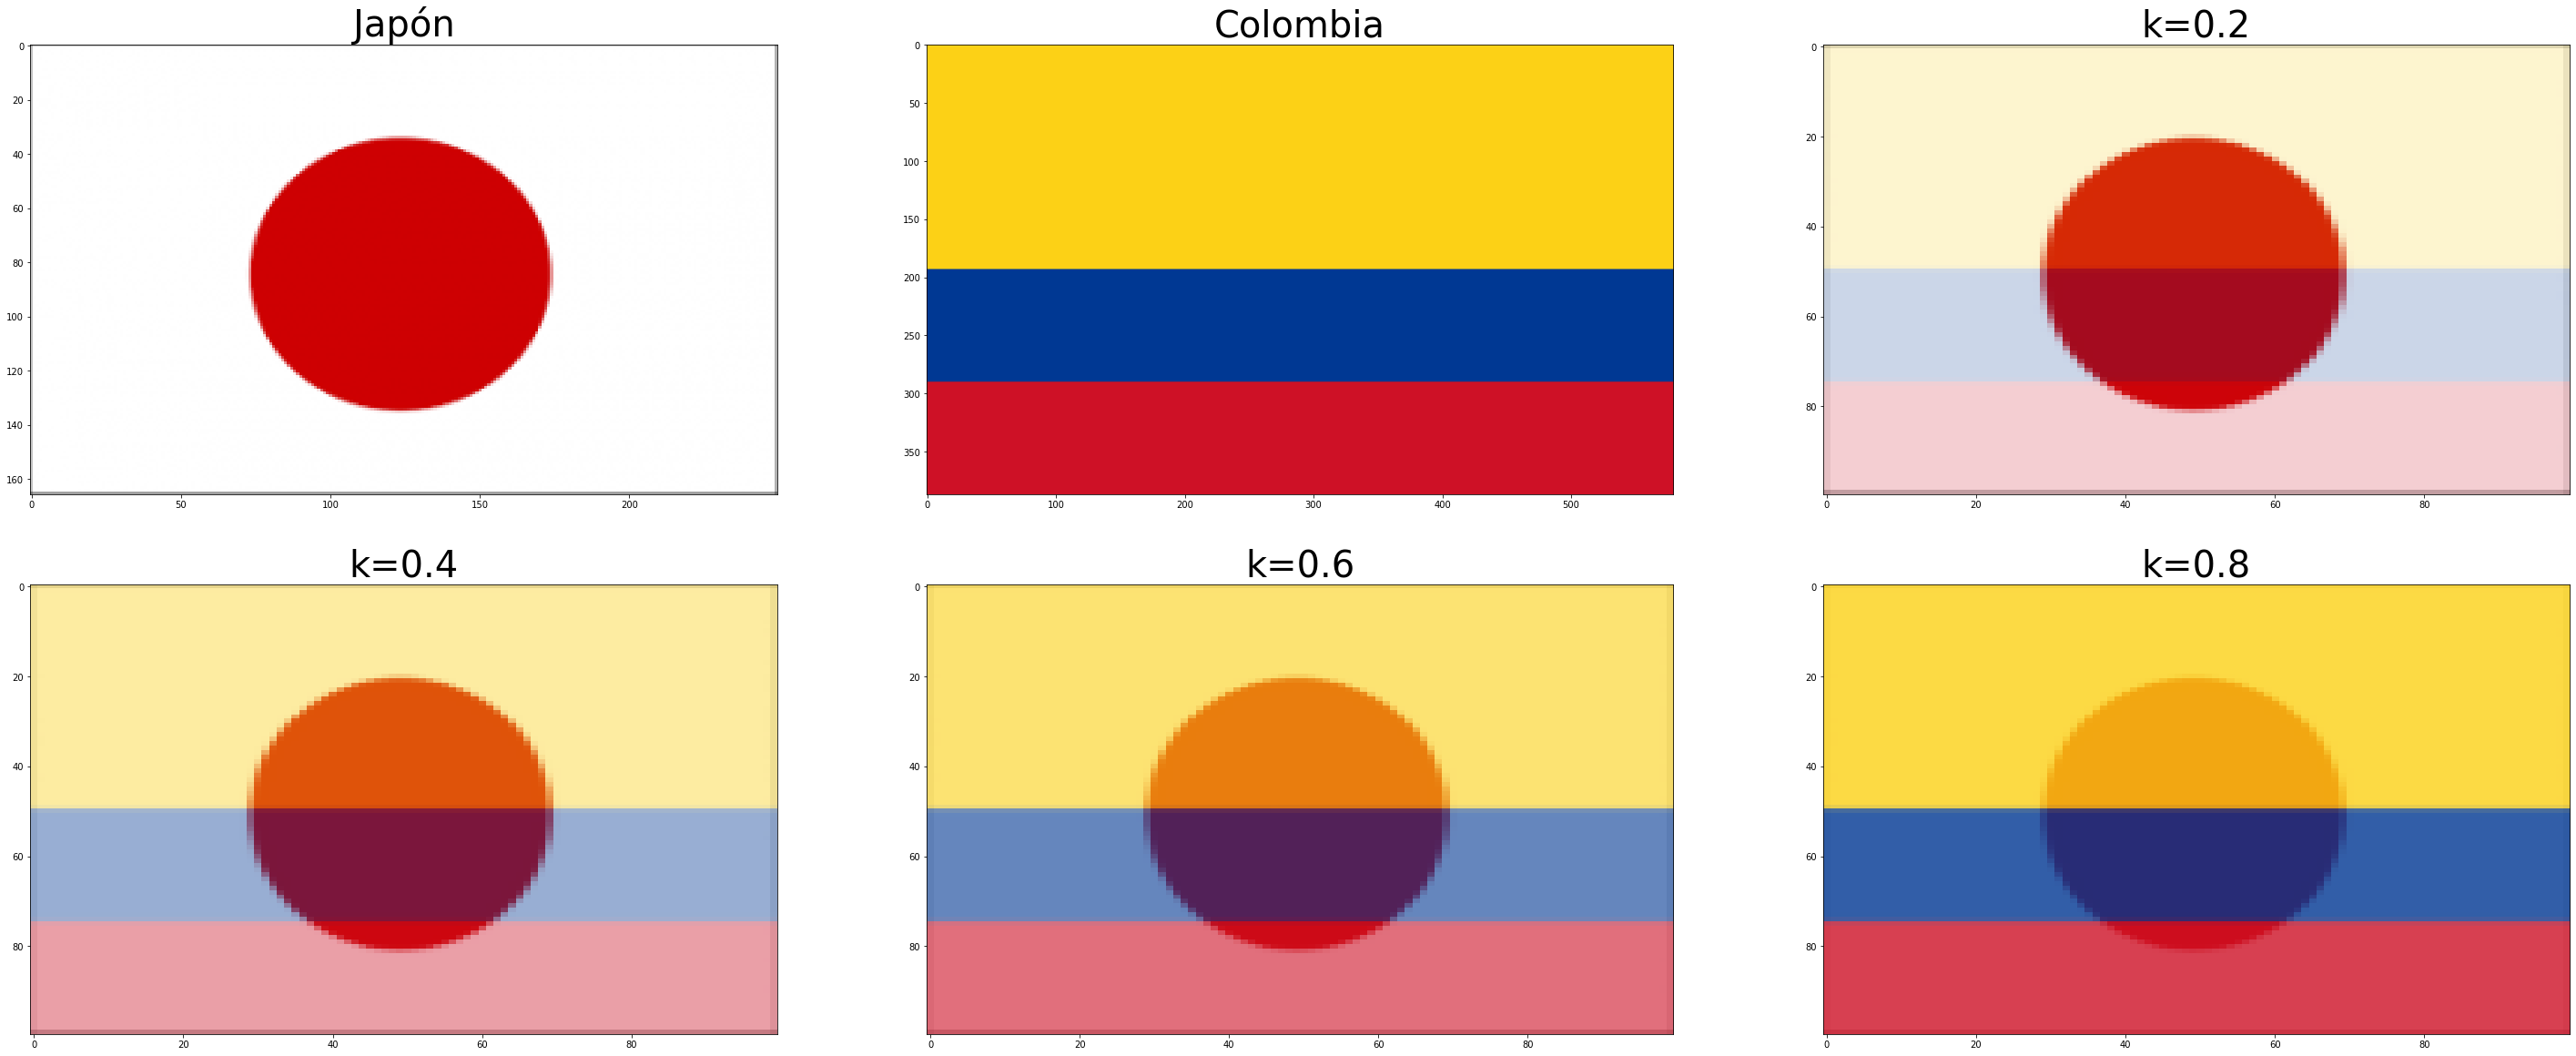

In [9]:
from skimage.transform import resize

def F(img,img2,k):
    img=resize(img,(100,100))
    img2=resize(img2,(100,100))
    return (1-k)*img + k*img2
G= F(img,img2,0.4)
G1=F(img,img2,0.2)
G2=F(img,img2,0.6)
G3=F(img,img2,0.8)

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(50, 20))
ax1.set_title('Japón',fontsize=40)
ax1.imshow(img, aspect='auto')
ax2.set_title('Colombia',fontsize=40)
ax2.imshow(img2,  aspect='auto')
ax3.set_title('k=0.2',fontsize=40)
ax3.imshow(G1, aspect='auto')
ax4.set_title('k=0.4',fontsize=40)
ax4.imshow(G, aspect='auto')
ax5.set_title('k=0.6',fontsize=40)
ax5.imshow(G2, aspect='auto')
ax6.set_title('k=0.8',fontsize=40)
ax6.imshow(G3, aspect='auto')



# <center> $ G(x,y) = a*I1(x,y) + b $ </center>

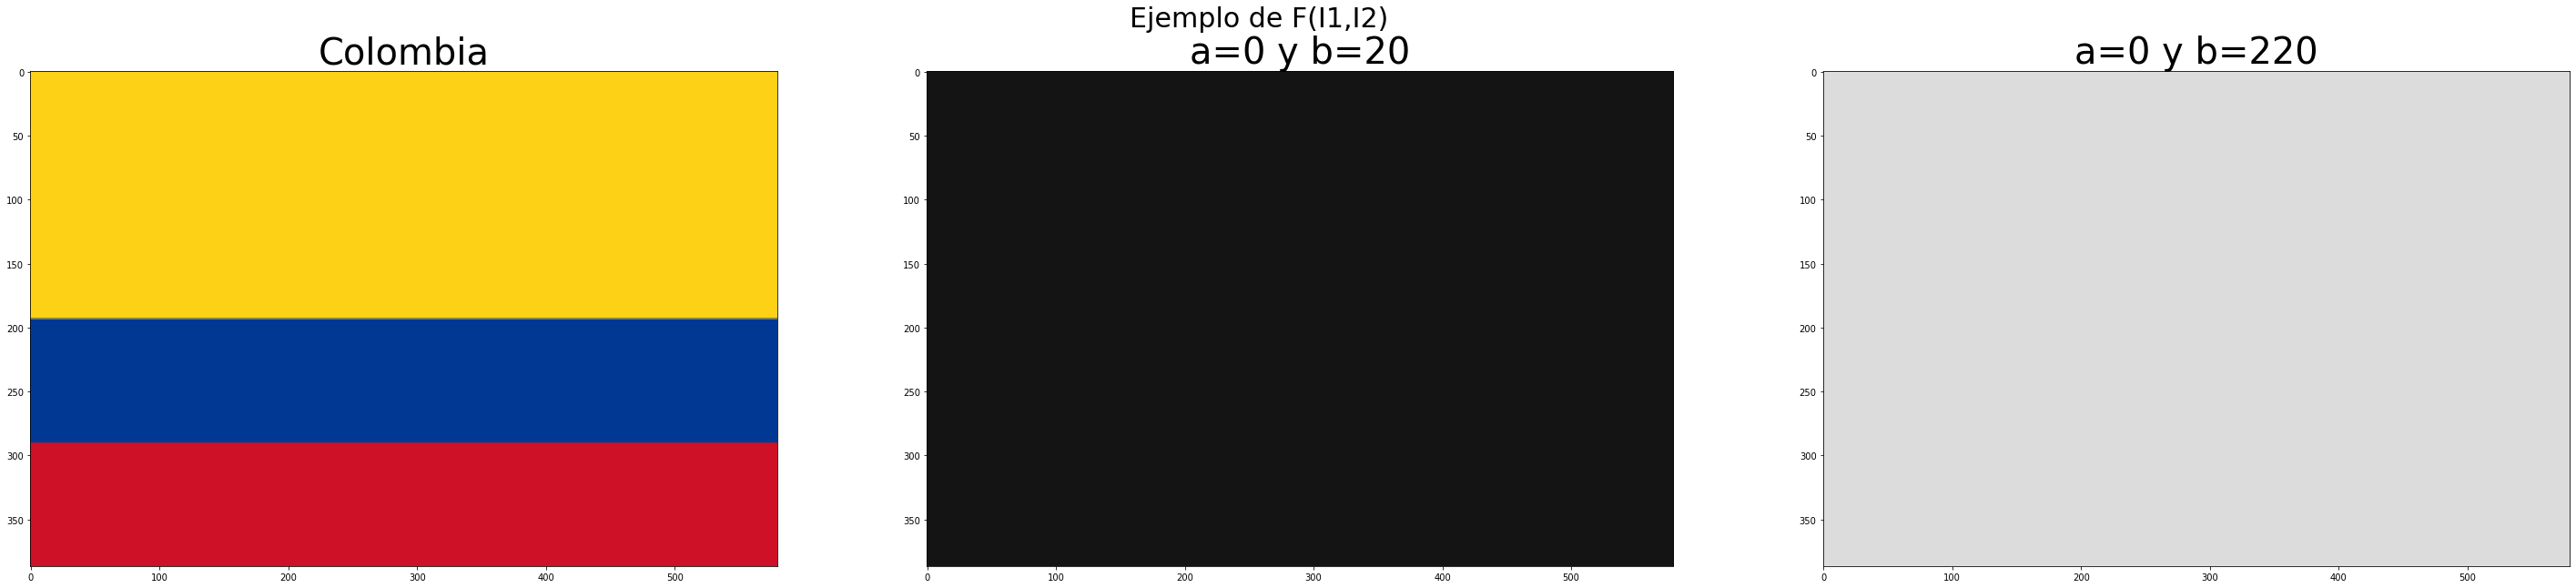

In [10]:
def H(img2,a,b):
    return a*img2 + b
G= H(img2,0,20)
G1=H(img2,0,220)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(50, 10))
fig.suptitle('Ejemplo de F(I1,I2)', fontsize=30)
ax1.set_title('Colombia',fontsize=40)
ax1.imshow(img2,  aspect='auto')
ax2.set_title('a=0 y b=20',fontsize=40)
ax2.imshow(G, aspect='auto')
ax3.set_title('a=0 y b=220',fontsize=40)
ax3.imshow(G1, aspect='auto')

Al multiplicar por una constante k<1, estamos bajando el contraste de las imágenes. La variación de k indica el porcentaje de contraste que se va a bajar en una de ellas, y el porcentaje restante se le asigna a la otra. Al superponerlas, la imagen que se multiplique por una constante mayor es la que va a ser más visible.

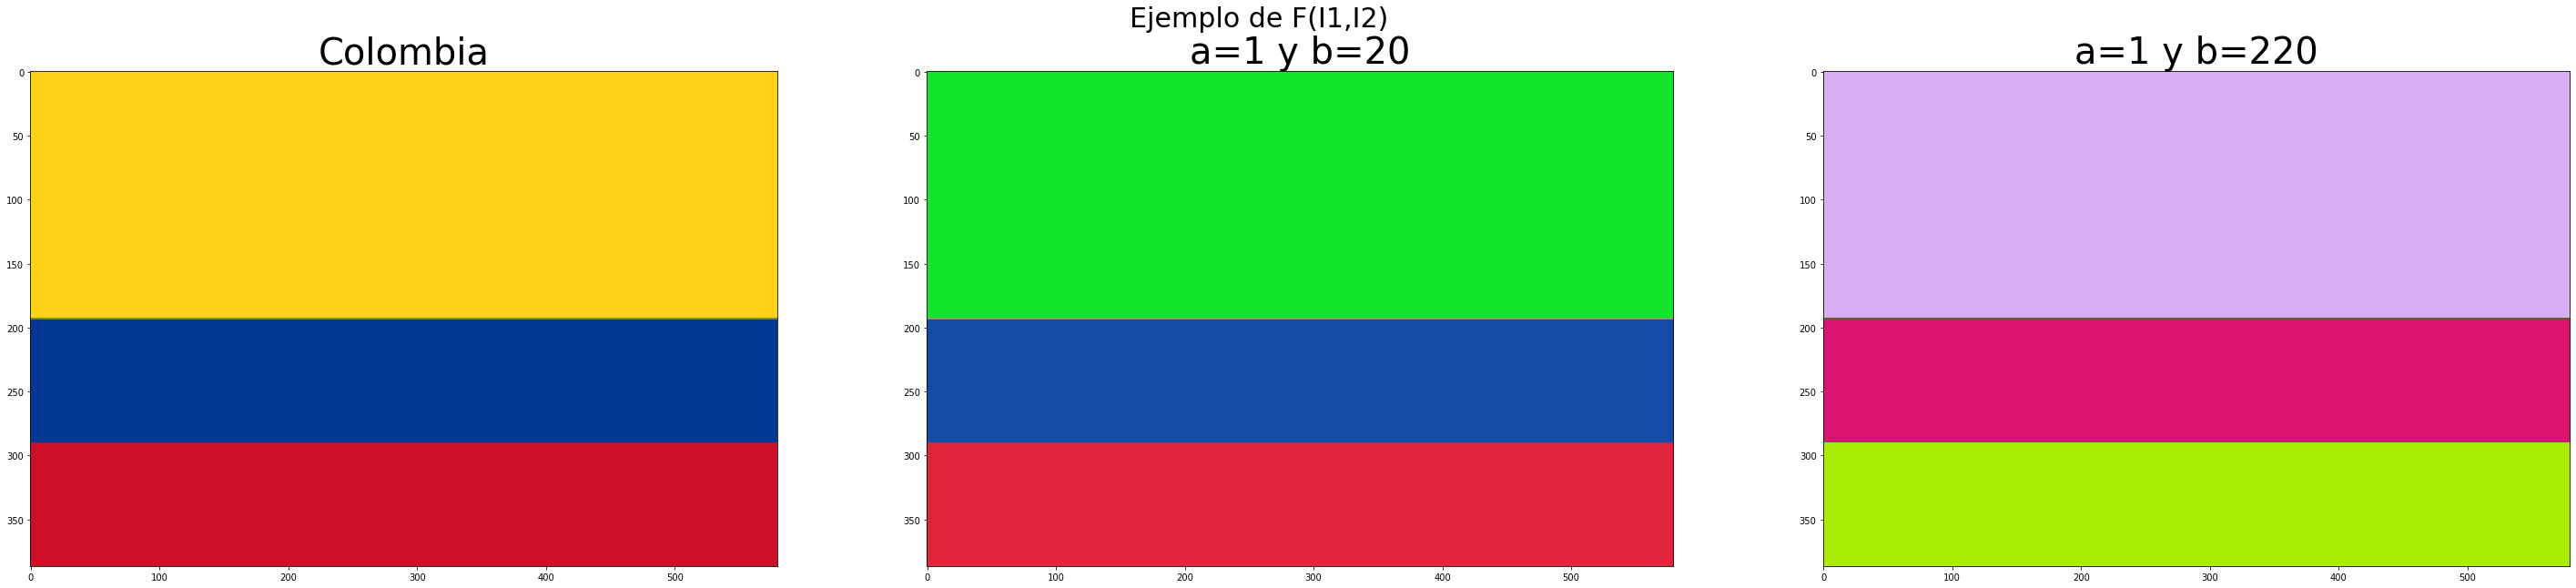

In [14]:

G= H(img2,1,20)
G1=H(img2,1,220)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(50, 10))
fig.suptitle('Ejemplo de F(I1,I2)', fontsize=30)
ax1.set_title('Colombia',fontsize=40)
ax1.imshow(img2,  aspect='auto')
ax2.set_title('a=1 y b=20',fontsize=40)
ax2.imshow(G, aspect='auto')
ax3.set_title('a=1 y b=220',fontsize=40)
ax3.imshow(G1, aspect='auto')

<br></br>
Al cambiar a=1, se obtendría la misma imagen. Si se toma a>1 se aumentaría el contraste. A medida que se aumenta el valor b, el color incrementa su nivel de saturación(Se le suma en la variable R del canal por predeterminación). Si elegimos b > 255, no se permite ya que sobrepasa el valor máximo que puede tomar el canal.


## Punto 2:

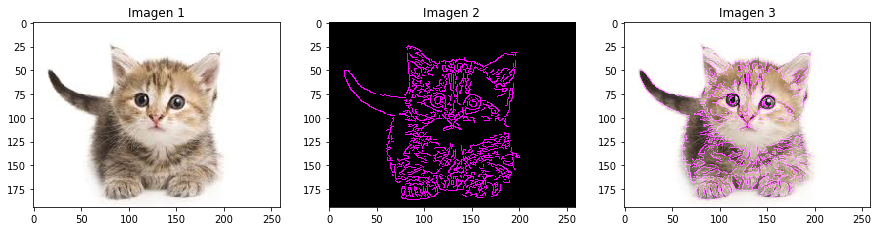

In [19]:
#Leer la imagen de entrada
img1=cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)

#Utilizamos la función cv2.Canny, que corresponde a un algoritmo de detección de bordes
edges = cv2.Canny(img1,100,200)
#Resaltar los bordes de blanco si sus pixeles son menores que un valor umbral
edges[edges<128] = 0   
#Convertir la imagen edges a RGB
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

edges[:,:,1]=0

#Crear una figura 1x3 para mostrar la imagen de entrada, la imagen obtenida con edges y la superposición
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(cv2.add(img1,edges),cmap='gray')
plt.title("Imagen 3");


Primero se obtienen los bordes con cv2.Canny(), luego al sumar los bordes con la imagen original se obtiene una superposición de las dos imágenes sumadas, dando como resultado una imagen con contornos pronunciados.